In [1]:
from sqlalchemy import create_engine, Column, Integer, String, Date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.ext.declarative import declarative_base
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydotplus
from IPython.display import Image

In [2]:
# Create our database engine
engine = create_engine('sqlite:///../heart_diagnosis.sqlite')

In [3]:
# Read data from CSV and load into a dataframe object
data = pd.read_csv('heart.csv')
 
# Write data into the table in PostgreSQL database
data.to_sql('heart_diagnosis',engine, if_exists = "replace", index = False)

303

In [4]:
# Query ALL Records in the database and create a dataframe
conn = engine.connect()
Heart_data = pd.read_sql("SELECT * FROM heart_diagnosis" , conn)
Heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Get number of rows and columns 
Heart_data.shape

(303, 14)

In [6]:
# Drop rows with missing data
cleaned_df = Heart_data.dropna()

In [7]:
# Get number of rows and columns after dropping rows with missing data
cleaned_df.shape

(303, 14)

In [8]:
# Check all the data types for all the columns
cleaned_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# Determine the number of unique values in each column.
cleaned_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
cleaned_df = cleaned_df.drop('fbs', axis=1)
#cleaned_df = cleaned_df.drop('sex', axis=1)
#cleaned_df = cleaned_df.drop('restecg', axis=1)
#cleaned_df = cleaned_df.drop('cp', axis=1)
#cleaned_df = cleaned_df.drop('age', axis=1)
#cleaned_df = cleaned_df.drop('trestbps', axis=1)
#cleaned_df = cleaned_df.drop('oldpeak', axis=1)
#cleaned_df = cleaned_df.drop('exang', axis=1)
#cleaned_df = cleaned_df.drop('thal', axis=1)

In [11]:
df = pd.get_dummies(cleaned_df, columns=['cp', 'slope', 'thal'])
#df = cleaned_df

In [12]:
x = data.drop(['target'],axis=1)
y = data['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [14]:
scaler = StandardScaler()

In [15]:
X_scaler = scaler.fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model = model.fit(X_train_scaled, y_train)

In [19]:
predictions = model.predict(X_test_scaled)

In [20]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


acc_score = accuracy_score(y_test, predictions)
bal_score =balanced_accuracy_score(y_test, predictions)

In [21]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))
print(f"BalancedAccuracy Score : {bal_score}")

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,29,6
Actual 1,13,28


Accuracy Score : 0.75
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.82      0.68      0.75        41

    accuracy                           0.75        76
   macro avg       0.76      0.76      0.75        76
weighted avg       0.76      0.75      0.75        76

BalancedAccuracy Score : 0.7557491289198607


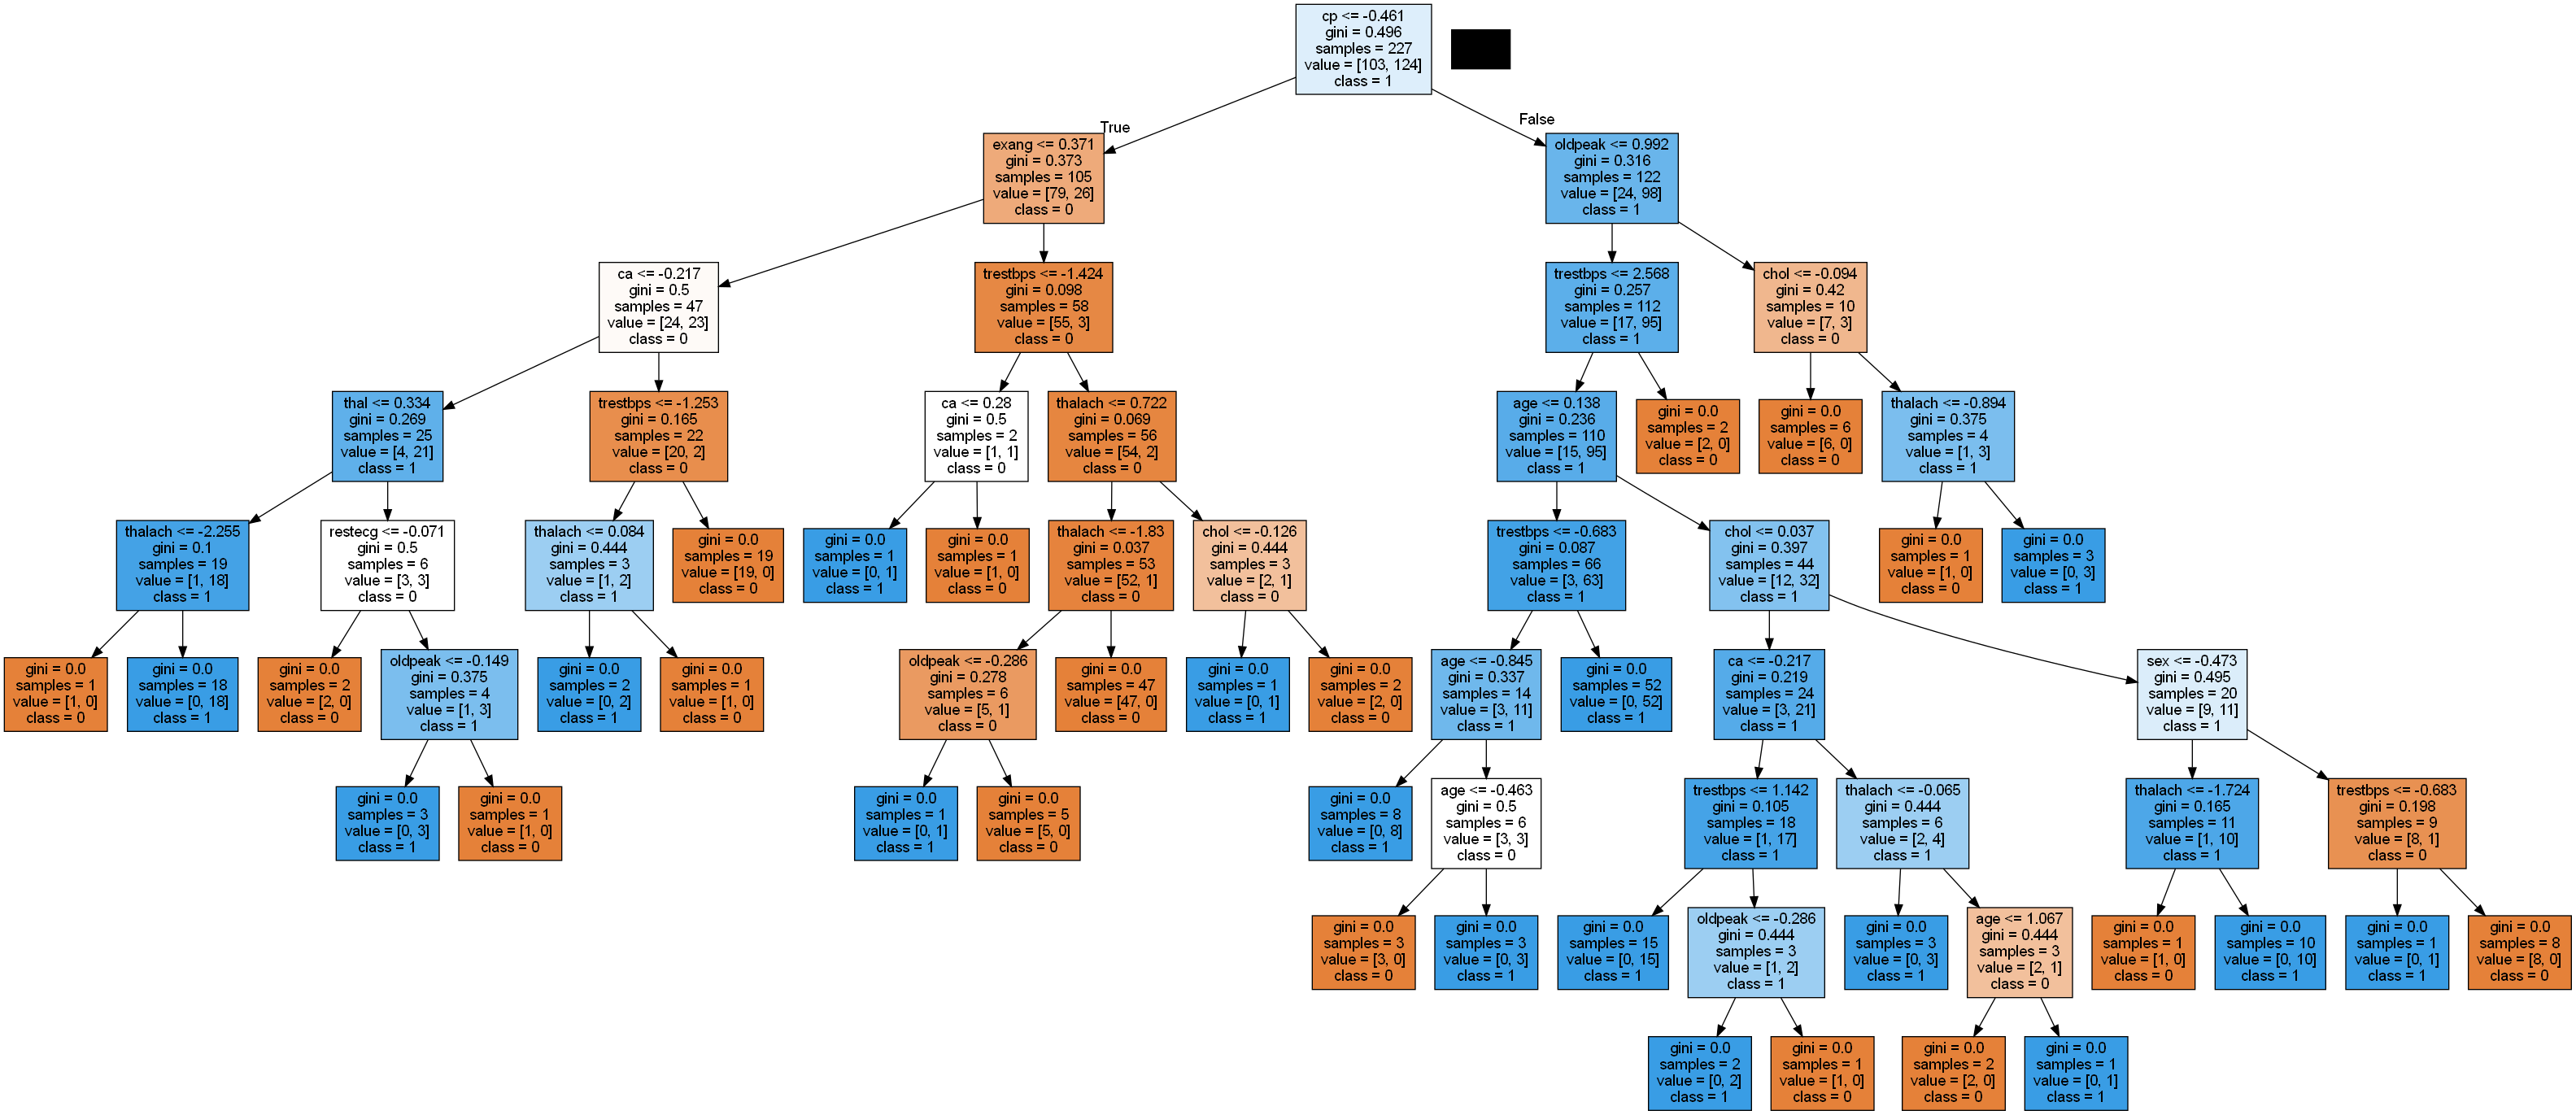

In [22]:
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=x.columns, class_names=["0", "1"], filled=True
)


graph = pydotplus.graph_from_dot_data(dot_data)


Image(graph.create_png())


Accuracy:  0.8024154589371981
BalancedAccuracy Score : 0.7557491289198607


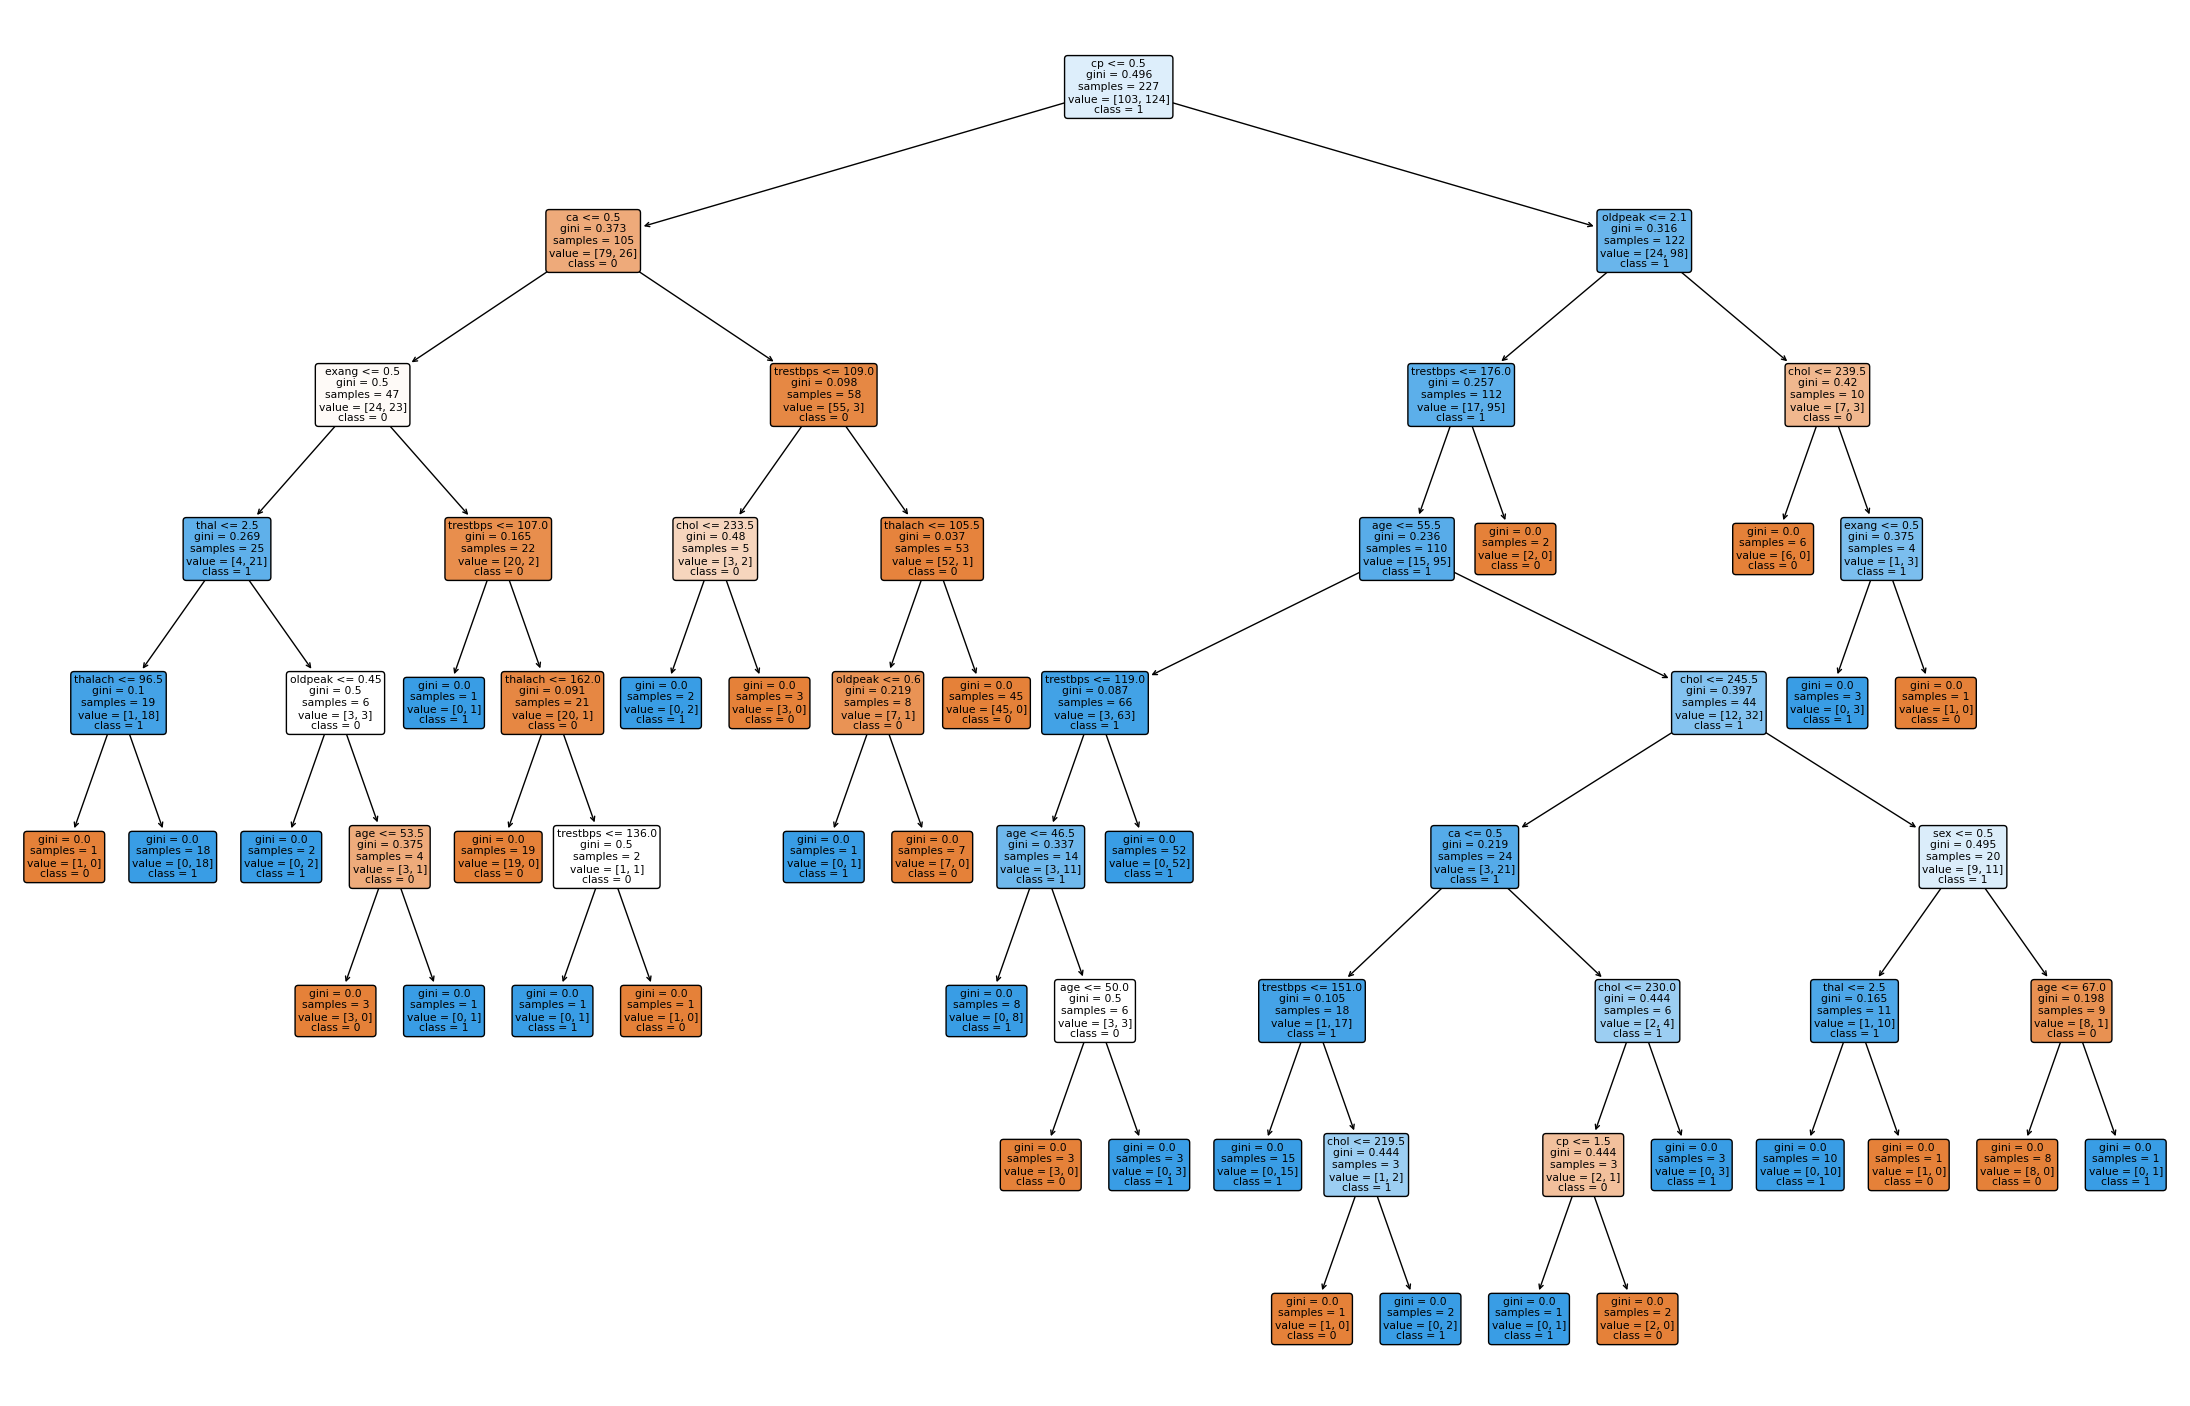

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Cross validation
dt_accuracy = np.mean(cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy'))
print("Accuracy: ", dt_accuracy)
print(f"BalancedAccuracy Score : {bal_score}")

# Plotting the tree
plt.figure(figsize=(28, 18))
plot_tree(dt, filled=True, rounded=True, class_names=['0', '1'], feature_names=x.columns);